# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


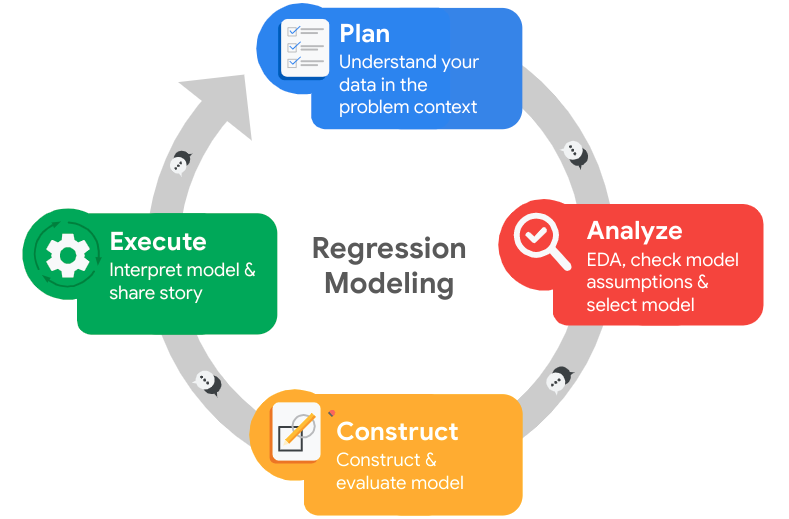

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

#### **Who are your stakeholders for this project?**
The stakeholders for this project include:

1. **HR Department**: Responsible for employee satisfaction and retention strategies, they will use the insights to implement data-driven initiatives to reduce turnover.
2. **Managers and Department Heads**: They rely on insights from data analysis to make informed decisions about team management and organizational policies.
3. **C-suite Executives (e.g., Chief HR Officer)**: High-level decision-makers who are focused on long-term strategies for employee retention, cost reduction, and overall company performance.
4. **Data Analysts and Scientists**: They support the project by analyzing employee-related data to extract actionable insights, working closely with the HR team to ensure data quality and relevance.
5. **Employees**: Indirect stakeholders who benefit from improved workplace satisfaction and policies aimed at enhancing their overall experience.

#### **What are you trying to solve or accomplish?**
1. **Predict** which employees are likely to leave the company using a regression or machine learning model.
2. **Identify factors** influencing employee attrition.
3. Provide **data-driven recommendations** to help Salifort Motors improve retention rates.
4. Deliver two artifacts: a **one-page summary** for external stakeholders and a **complete code notebook**.

---

#### **What are your initial observations when you explore the data?**
1. The dataset consists of **15,000 rows and 10 variables**, providing rich information about employee satisfaction, performance, and experiences.
2. Variables like `satisfaction_level`, `last_evaluation`, and `average_monthly_hours` likely have strong relationships with employee turnover.
3. Features such as `Work_accident`, `promotion_last_5years`, and `salary` could reveal organizational factors affecting employee decisions.
4. The target variable, `left`, indicates whether an employee left the company.

---

#### **What resources do you find yourself using as you complete this stage?**
1. **Kaggle**: [HR Analytics Dataset Source](https://www.kaggle.com/datasets)
2. **Python Libraries**:
   - [Pandas Documentation](https://pandas.pydata.org/)
   - [Matplotlib Documentation](https://matplotlib.org/stable/contents.html)
   - [Seaborn Documentation](https://seaborn.pydata.org/)
   - [Scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
3. **Ethics Resources**:
   - Articles on bias reduction in AI and machine learning.
   - Resources on data privacy and ethical data use.

---

#### **Do you have any ethical considerations in this stage?**
1. **Employee Privacy**: Ensure employee data is anonymized and handled responsibly.
2. **Bias in Data**: Be cautious of potential biases in variables like `salary` or `promotion_last_5years`.
3. **Transparency**: Clearly communicate the methodology, limitations, and intended use of the model to stakeholders.
4. **Fair Usage**: Ensure that predictions are used to improve employee retention rather than penalize employees predicted to leave.
5. **Stakeholder Collaboration**: Discuss findings and strategies with the HR team to ensure ethical implementation of insights.

---


## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# !pip install lightgbm

In [2]:
# !pip install catboost

In [32]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [4]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [5]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [6]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
df0[['Department', 'salary']].describe()

,Department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [8]:
# Display all column names
### YOUR CODE HERE ###
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

In [9]:
# Rename columns as needed
### YOUR CODE HERE ###
df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                    'time_spend_company': 'tenure'}, inplace=True)

# Display all column names after the update
### YOUR CODE HERE ###
df0.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_monthly_hours',
 'tenure',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Department',
 'salary']

### Check missing values

Check for any missing values in the data.

In [10]:
# Check for missing values
### YOUR CODE HERE ###
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [11]:
# Check for duplicates
### YOUR CODE HERE ###
duplicates = df0.duplicated()
duplicates.sum()

3008

In [12]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0[duplicates].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [13]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_monthly_hours  11991 non-null  int64  
 4   tenure                 11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   left                   11991 non-null  int64  
 7   promotion_last_5years  11991 non-null  int64  
 8   Department             11991 non-null  object 
 9   salary                 11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


### Check outliers

Check for outliers in the data.

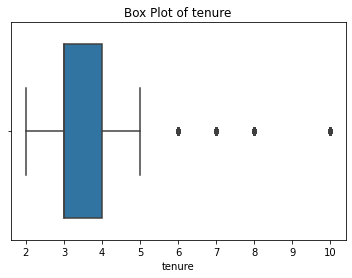

In [15]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

sns.boxplot(data=df1, x = 'tenure')
plt.title('Box Plot of tenure')
plt.show()

In [16]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# using interquartile range method
Q1 = df1['tenure'].quantile(0.75)
Q3 = df1['tenure'].quantile(0.25)
IQR = Q1 - Q3

lower_bound = Q3 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

outliers = df1[(df1['tenure'] <= lower_bound) | (df1['tenure'] >= upper_bound)]
len(outliers)

824

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [17]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###
left_counts = df1['left'].value_counts()

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
left_percentages = df1['left'].value_counts(normalize=True) * 100

left_counts, left_percentages

(0    10000
 1     1991
 Name: left, dtype: int64,
 0    83.39588
 1    16.60412
 Name: left, dtype: float64)

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

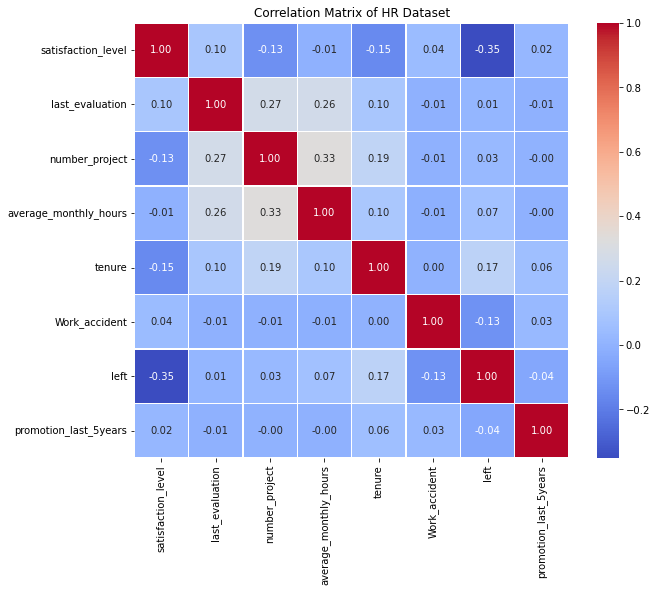

In [18]:
# Create a plot as needed
### YOUR CODE HERE ###
# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, square=True)
plt.title('Correlation Matrix of HR Dataset')
plt.show()

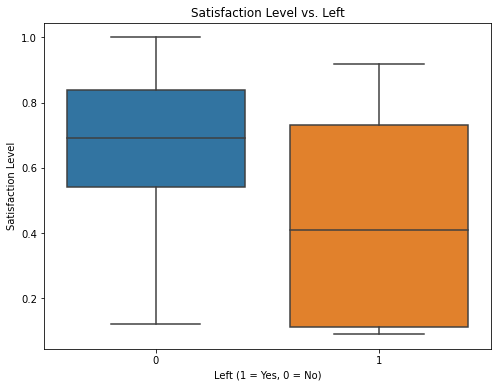

In [19]:
# Create a plot as needed
### YOUR CODE HERE ###
# Plot 1: Satisfaction Level vs. Left
plt.figure(figsize=(8, 6))
sns.boxplot(x='left', y='satisfaction_level', data=df1)
plt.title('Satisfaction Level vs. Left')
plt.xlabel('Left (1 = Yes, 0 = No)')
plt.ylabel('Satisfaction Level')
plt.show()

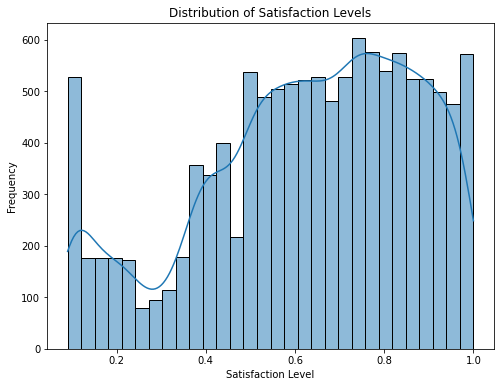

In [20]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.histplot(df1['satisfaction_level'], kde=True, bins=30)
plt.title('Distribution of Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.show()

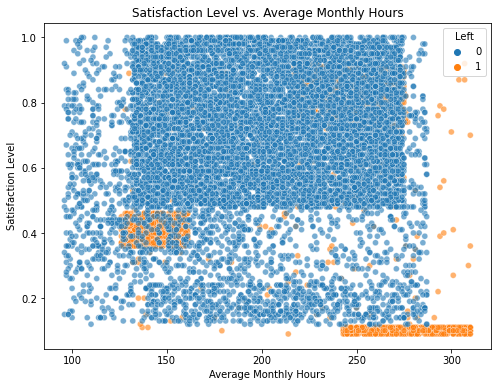

In [21]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.6)
plt.title('Satisfaction Level vs. Average Monthly Hours')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(title='Left', loc='upper right')
plt.show()

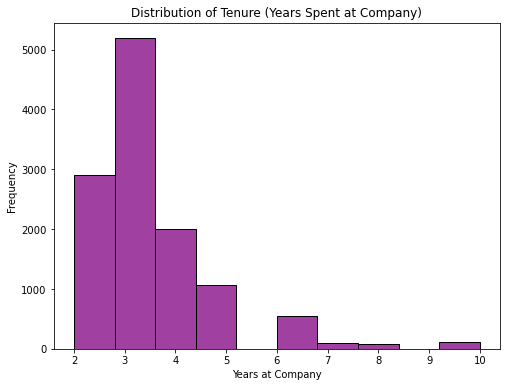

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.histplot(df1['tenure'], kde=False, bins=10, color='purple')
plt.title('Distribution of Tenure (Years Spent at Company)')
plt.xlabel('Years at Company')
plt.ylabel('Frequency')
plt.show()

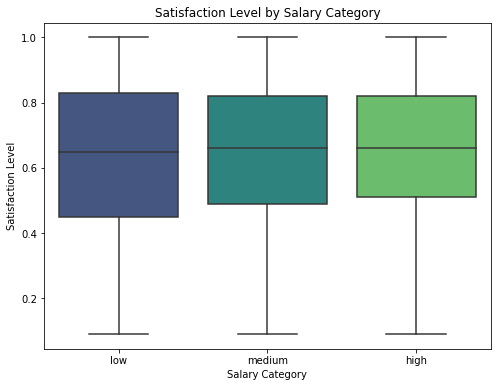

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.boxplot(data=df1, x='salary', y='satisfaction_level', palette='viridis')
plt.title('Satisfaction Level by Salary Category')
plt.xlabel('Salary Category')
plt.ylabel('Satisfaction Level')
plt.show()

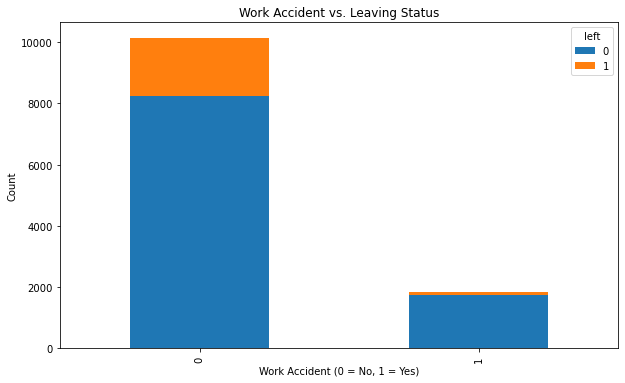

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###
work_accident_left_counts = df1.groupby(['Work_accident', 'left']).size().unstack()
work_accident_left_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Work Accident vs. Leaving Status')
plt.xlabel('Work Accident (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

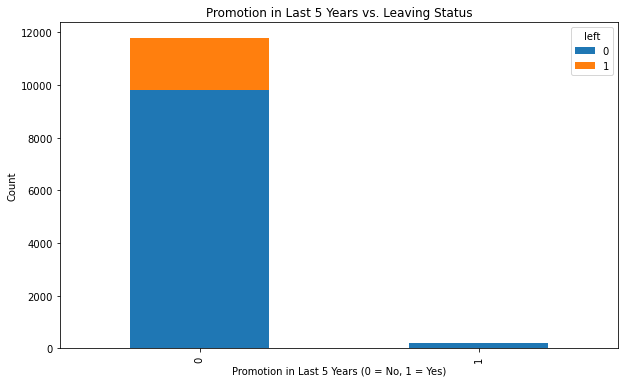

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###
promotion_left_counts = df1.groupby(['promotion_last_5years', 'left']).size().unstack()
promotion_left_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Promotion in Last 5 Years vs. Leaving Status')
plt.xlabel('Promotion in Last 5 Years (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

1. **Prediction Task Type**:
   - The target variable in this dataset is `left`, which indicates whether an employee left the company or not (binary: 0 = stayed, 1 = left).
   - This makes the task a **binary classification problem**, as we aim to predict one of two possible outcomes based on the given features.

### Identify the types of models most appropriate for this task.

   - For a binary classification task, the following models are most suitable:
     - **Logistic Regression**: A simple and interpretable model for binary classification tasks.
     - **Decision Trees**: For capturing non-linear relationships in the data.
     - **Random Forests**: An ensemble model that combines multiple decision trees, offering improved accuracy and robustness.
     - **Gradient Boosting Models (e.g., XGBoost, LightGBM, CatBoost)**: Powerful ensemble methods known for high accuracy in classification tasks.
     - **Support Vector Machines (SVM)**: Effective for both linear and non-linear classification problems.
     - **Neural Networks**: Useful if the dataset is large and there are complex patterns in the data.

### Modeling

In [26]:
# coding here
X = df1[['satisfaction_level', 'last_evaluation', 'average_monthly_hours', 'tenure', 'number_project']]  # Example features
y = df1['left']  # Target variable

In [27]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# Standardizing features for models sensitive to scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Define Models
logistic_model = LogisticRegression(random_state=42)
svm_model = SVC(probability=True, random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# lightgbm_model = lgb.LGBMClassifier(random_state=42)
# catboost_model = CatBoostClassifier(verbose=0, random_state=42)

In [30]:
# Step 5: Evaluation Function with K-Fold Cross Validation
def evaluate_model_with_kfold(model, X_train, y_train, X_test, y_test, scaled=False, cv=5):
    if scaled:
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)
    
    # Perform K-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    
    # Fit the model and evaluate
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_prob_test = model.predict_proba(X_test)[:, 1]
    
    metrics = {
        'Model': model.__class__.__name__,
        'K-Fold AUC-ROC Mean': cv_scores.mean(),
        'K-Fold AUC-ROC Std': cv_scores.std(),
        'Test Accuracy': accuracy_score(y_test, y_pred_test),
        'Test AUC-ROC': roc_auc_score(y_test, y_prob_test),
        'Precision': precision_score(y_test, y_pred_test),
        'Recall': recall_score(y_test, y_pred_test),
        'F1-Score': f1_score(y_test, y_pred_test),
    }
    return metrics

In [33]:
# Step 6: Evaluate All Models
results_with_kfold = []
for model, scale in [
    (logistic_model, True),
    (svm_model, True),
    (random_forest_model, False),
    (xgboost_model, False),
#     (lightgbm_model, False),
#     (catboost_model, False)
]:
    metrics = evaluate_model_with_kfold(model, X_train, y_train, X_test, y_test, scaled=scale, cv=5)
    results_with_kfold.append(metrics)

In [35]:
# Step 7: Summarize Results
evaluation_results_metrics = pd.DataFrame(results_with_kfold)

# Display the results
print("Model Evaluation Results with Comprehensive Metrics:")
print(evaluation_results_metrics)

Model Evaluation Results with Comprehensive Metrics:
                    Model  K-Fold AUC-ROC Mean  K-Fold AUC-ROC Std  \
0      LogisticRegression             0.792924            0.018227   
1                     SVC             0.967536            0.003178   
2  RandomForestClassifier             0.979744            0.005216   
3           XGBClassifier             0.980292            0.005144   

   Test Accuracy  Test AUC-ROC  Precision    Recall  F1-Score  
0       0.830183      0.804663   0.479798  0.157546  0.237203  
1       0.972485      0.965988   0.931507  0.902156  0.916596  
2       0.983046      0.974921   0.983929  0.913765  0.947549  
3       0.980267      0.977993   0.966667  0.913765  0.939471  


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

1. **Logistic Regression**:
   - K-Fold AUC-ROC Mean: 0.793
   - Test Accuracy: 83.02%
   - Test AUC-ROC: 0.805
   - Precision: 47.98%
   - Recall: 15.75%
   - F1-Score: 23.72%
   - **Summary**: While the Logistic Regression model shows decent AUC-ROC performance, its precision and recall are significantly low, indicating poor performance in identifying positive instances (employees who left).

2. **Support Vector Machine (SVM)**:
   - K-Fold AUC-ROC Mean: 0.968
   - Test Accuracy: 97.25%
   - Test AUC-ROC: 0.966
   - Precision: 93.15%
   - Recall: 90.22%
   - F1-Score: 91.66%
   - **Summary**: The SVM model performs exceptionally well, with high precision, recall, and F1-Score, indicating excellent balance in identifying both true positives and negatives.

3. **Random Forest Classifier**:
   - K-Fold AUC-ROC Mean: 0.980
   - Test Accuracy: 98.30%
   - Test AUC-ROC: 0.975
   - Precision: 98.39%
   - Recall: 91.38%
   - F1-Score: 94.75%
   - **Summary**: The Random Forest model shows strong performance with the highest accuracy and an impressive balance between precision and recall, making it a top performer for this task.

4. **XGBoost Classifier**:
   - K-Fold AUC-ROC Mean: 0.980
   - Test Accuracy: 98.03%
   - Test AUC-ROC: 0.978
   - Precision: 96.67%
   - Recall: 91.38%
   - F1-Score: 93.95%
   - **Summary**: XGBoost also performs exceptionally well, with high precision, recall, and F1-Score, closely matching the performance of Random Forest.

---

### Conclusion, Recommendations, Next Steps

### Conclusion, Recommendations, and Next Steps

#### **Conclusion**:
1. **Best Performing Models**:
   - The **Random Forest Classifier** and **XGBoost Classifier** demonstrated the best performance, with nearly identical metrics.
   - Both models achieved high AUC-ROC scores (0.975+), indicating excellent discriminative ability, along with strong precision, recall, and F1-Scores.
   
2. **SVM**:
   - SVM also performed exceptionally well, with competitive metrics, but Random Forest and XGBoost slightly outperformed it in terms of precision and recall balance.

3. **Logistic Regression**:
   - While simple and interpretable, Logistic Regression showed the weakest performance in identifying employees who left, with low precision and recall.

---

#### **Recommendations**:
1. Use **Random Forest Classifier** or **XGBoost Classifier** for deployment as they provide the best balance of accuracy, precision, and recall.
2. **SVM** can be considered as an alternative model for situations where interpretability is less critical and computational resources are sufficient.
3. Avoid using Logistic Regression for this task due to its inability to effectively capture the complexity of the data.

---

#### **Next Steps**:
1. **Feature Importance**:
   - For tree-based models like Random Forest and XGBoost, analyze feature importance to understand key drivers behind employee turnover.
2. **Hyperparameter Optimization**:
   - Fine-tune hyperparameters for Random Forest and XGBoost using techniques like Grid Search or Bayesian Optimization to further improve performance.
3. **Deployment**:
   - Develop a deployment pipeline for the selected model, including real-time predictions and monitoring of model performance over time.
4. **Business Insights**:
   - Share insights from feature importance with stakeholders to implement actionable strategies for improving employee retention.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.